# Prophet final simulation

In [45]:
CHANGE = "constant"

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_from_json
import json
import plotly.graph_objs as go
import plotly.io as pio

# Load your saved Prophet model from JSON
with open('/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/predictions/Prophet/prophet_model.json', 'r') as fin:
    model = model_from_json(fin.read())

# Load the data with covariates
df = pd.read_csv(f'../final_df_{CHANGE}.csv')

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data to include one year before the forecast start date
forecast_start_date = '2024-06-28'
one_year_earlier = pd.to_datetime(forecast_start_date) - pd.DateOffset(years=2)
historical_data = df[(df['Date'] >= one_year_earlier) &
                     (df['Date'] <= forecast_start_date)]

# Filter the data to only include rows after June 2024 for the actual forecasting
future_data = df[df['Date'] > '2024-07-28']

# Ensure the 'ds' and 'y' columns are set up for Prophet
future_data = future_data.rename(
    columns={'Date': 'ds', 'Day_ahead_price (€/MWh)': 'y'})

# Use future_data without the target 'y' for forecasting
future_covariates = future_data.drop(columns=['y'])

# Make future predictions using the loaded model
forecast = model.predict(future_covariates)

# Plot the forecasted results
# Historical data for the past year
trace_historical = go.Scatter(
    x=df['Date'],
    y=df['Day_ahead_price (€/MWh)'],
    mode='lines',
    name='Historical',
    line=dict(color='black')
)

# Forecasted results
trace_predicted = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Predicted',
    line=dict(color='blue')
)

trace_upper = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    mode='lines',
    name='Upper Confidence Interval',
    line=dict(color='lightblue', width=0),
    fill='tonexty',
    fillcolor='rgba(173,216,230,0.3)'
)

trace_lower = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    mode='lines',
    name='Lower Confidence Interval',
    line=dict(color='lightblue', width=0),
    showlegend=False,
    fill='tonexty',
    fillcolor='rgba(173,216,230,0.3)'
)

# Create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace_historical)
fig.add_trace(trace_predicted)
fig.add_trace(trace_upper)
fig.add_trace(trace_lower)

# Customize the layout
fig.update_layout(
    title=f'Prophet forecast for {CHANGE} trend of BEVs',
    xaxis_title='Date',
    yaxis_title='Day-ahead Price (€/MWh)',
    xaxis=dict(
        # Set x-axis to start at January 1, 2023
        range=['2023-01-01', forecast['ds'].max()]
    ),
    yaxis=dict(
        range=[0, 220]  # Set y-axis range with a cutoff slightly above 200
    ),
    legend=dict(x=1.05, y=1),
    margin=dict(t=60, b=20, l=20, r=20),  # Increase top margin (t) to 60
    width=1200,
    height=450
)


# Show the plot
pio.show(fig)

In [47]:
# Save the plot as .png
pio.write_image(fig, f'forecast_prophet_{CHANGE}.png')

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascension Day,Ascension Day_lower,Ascension Day_upper,BEV_vehicles,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-07-29,57.444083,51.729349,94.419675,57.444083,57.444083,0.0,0.0,0.0,-0.151352,...,-2.072336,-2.072336,-2.072336,-1.544190,-1.544190,-1.544190,0.0,0.0,0.0,73.537033
1,2024-07-30,57.445165,53.563864,95.883639,57.445165,57.445165,0.0,0.0,0.0,-0.151352,...,1.544570,1.544570,1.544570,-2.179470,-2.179470,-2.179470,0.0,0.0,0.0,73.841744
2,2024-07-31,57.446247,47.103173,89.205048,57.446247,57.446247,0.0,0.0,0.0,-0.090589,...,3.074512,3.074512,3.074512,-2.820772,-2.820772,-2.820772,0.0,0.0,0.0,67.596365
3,2024-08-01,57.447329,45.357211,88.435874,57.447329,57.447329,0.0,0.0,0.0,3.173291,...,4.486737,4.486737,4.486737,-3.417468,-3.417468,-3.417468,0.0,0.0,0.0,65.852007
4,2024-08-02,57.448411,39.211613,83.285888,57.448411,57.448411,0.0,0.0,0.0,3.173291,...,4.146121,4.146121,4.146121,-3.922441,-3.922441,-3.922441,0.0,0.0,0.0,61.891475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2026-07-24,58.228580,61.595462,103.737737,55.669051,60.451240,0.0,0.0,0.0,2.569994,...,4.146121,4.146121,4.146121,0.236294,0.236294,0.236294,0.0,0.0,0.0,82.467294
726,2026-07-25,58.229662,51.019603,95.205266,55.666766,60.456553,0.0,0.0,0.0,2.569994,...,-2.719560,-2.719560,-2.719560,0.194274,0.194274,0.194274,0.0,0.0,0.0,73.263965
727,2026-07-26,58.230744,46.332957,89.714214,55.664480,60.461866,0.0,0.0,0.0,2.569994,...,-8.460044,-8.460044,-8.460044,0.026722,0.026722,0.026722,0.0,0.0,0.0,67.937428
728,2026-07-27,58.231826,73.760941,114.820084,55.662195,60.467178,0.0,0.0,0.0,2.569994,...,-2.072336,-2.072336,-2.072336,-0.274823,-0.274823,-0.274823,0.0,0.0,0.0,93.540734


In [49]:
results = forecast[["ds", "yhat"]]
results.to_csv(f'prophet_results_{CHANGE}.csv', index=False)

## Plotting all results together

In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio

# Load the CSV files
df_constant = pd.read_csv('prophet_results_constant.csv')
df_decline = pd.read_csv('prophet_results_decline.csv')
df_growth = pd.read_csv('prophet_results_growth.csv')

# Merge them on the 'ds' column
merged_df = df_constant.merge(
    df_decline, on='ds', suffixes=('_constant', '_decline'))
merged_df = merged_df.merge(df_growth, on='ds')
merged_df.rename(columns={'yhat': 'yhat_growth'}, inplace=True)

# Plot the results
trace_constant = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_constant'],
    mode='lines',
    name='Constant Scenario',
    line=dict(color='blue')
)

trace_decline = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_decline'],
    mode='lines',
    name='Decline Scenario',
    line=dict(color='red')
)

trace_growth = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_growth'],
    mode='lines',
    name='Growth Scenario',
    line=dict(color='green')
)

# Create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace_constant)
fig.add_trace(trace_decline)
fig.add_trace(trace_growth)

# Customize the layout
fig.update_layout(
    title='Forecast Comparison for Different Scenarios',
    xaxis_title='Date',
    yaxis_title='Day-ahead Price (€/MWh)',
    legend=dict(x=1.05, y=1),
    margin=dict(t=60, b=20, l=20, r=20),
    width=1200,
    height=450
)

# Show the plot
pio.show(fig)

# Save the plot as .png
pio.write_image(fig, 'forecast_comparison.png')

In [53]:
merged_df

# save a csv
merged_df.to_csv('forecast_comparison.csv', index=False)

In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import scienceplots
import matplotlib.pyplot as plt

# Apply the SciencePlots style
plt.style.use(['science', 'no-latex'])


# Plot the original forecasts with customized styles
trace_true = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['Day_ahead_price (€/MWh)'],
    mode='lines',
    name='Historical Data Day Ahead Prices',
    line=dict(color='black', width=2)
)

trace_constant = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_constant'],
    mode='lines',
    name='Constant Scenario',
    line=dict(color='black', dash='solid', width=2)
)

trace_decline = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_decline'],
    mode='lines',
    name='Decline Scenario',
    line=dict(color='darkred', dash='dash', width=2)
)

trace_growth = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_growth'],
    mode='lines',
    name='Growth Scenario',
    line=dict(color='darkgoldenrod', dash='dashdot', width=2)
)

# Create the figure and add all traces
fig = go.Figure()
fig.add_trace(trace_true)
fig.add_trace(trace_constant)
fig.add_trace(trace_decline)
fig.add_trace(trace_growth)

# Customize the layout with a style similar to the provided plot
fig.update_layout(
    title='Forecast Comparison with Scenario Differences',
    xaxis_title='Date',
    yaxis_title='Number of Registered BEV',  # Modify title to match your style
    xaxis=dict(
        range=['2024-01-01', merged_df['ds'].max()],
        tickformat='%Y-%m',  # Format date labels
        showgrid=True,
        gridcolor='lightgrey',
        tickangle=45
    ),
    yaxis=dict(range=[-10, 130]),
    legend=dict(
        x=0.02,   # Position the legend inside the plot area
        y=0.98,
        # Semi-transparent white background
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="black",
        borderwidth=1,
        font=dict(size=12)
    ),
    margin=dict(t=60, b=40, l=40, r=20),
    width=1200,
    height=600
)

# Show the plot
pio.show(fig)

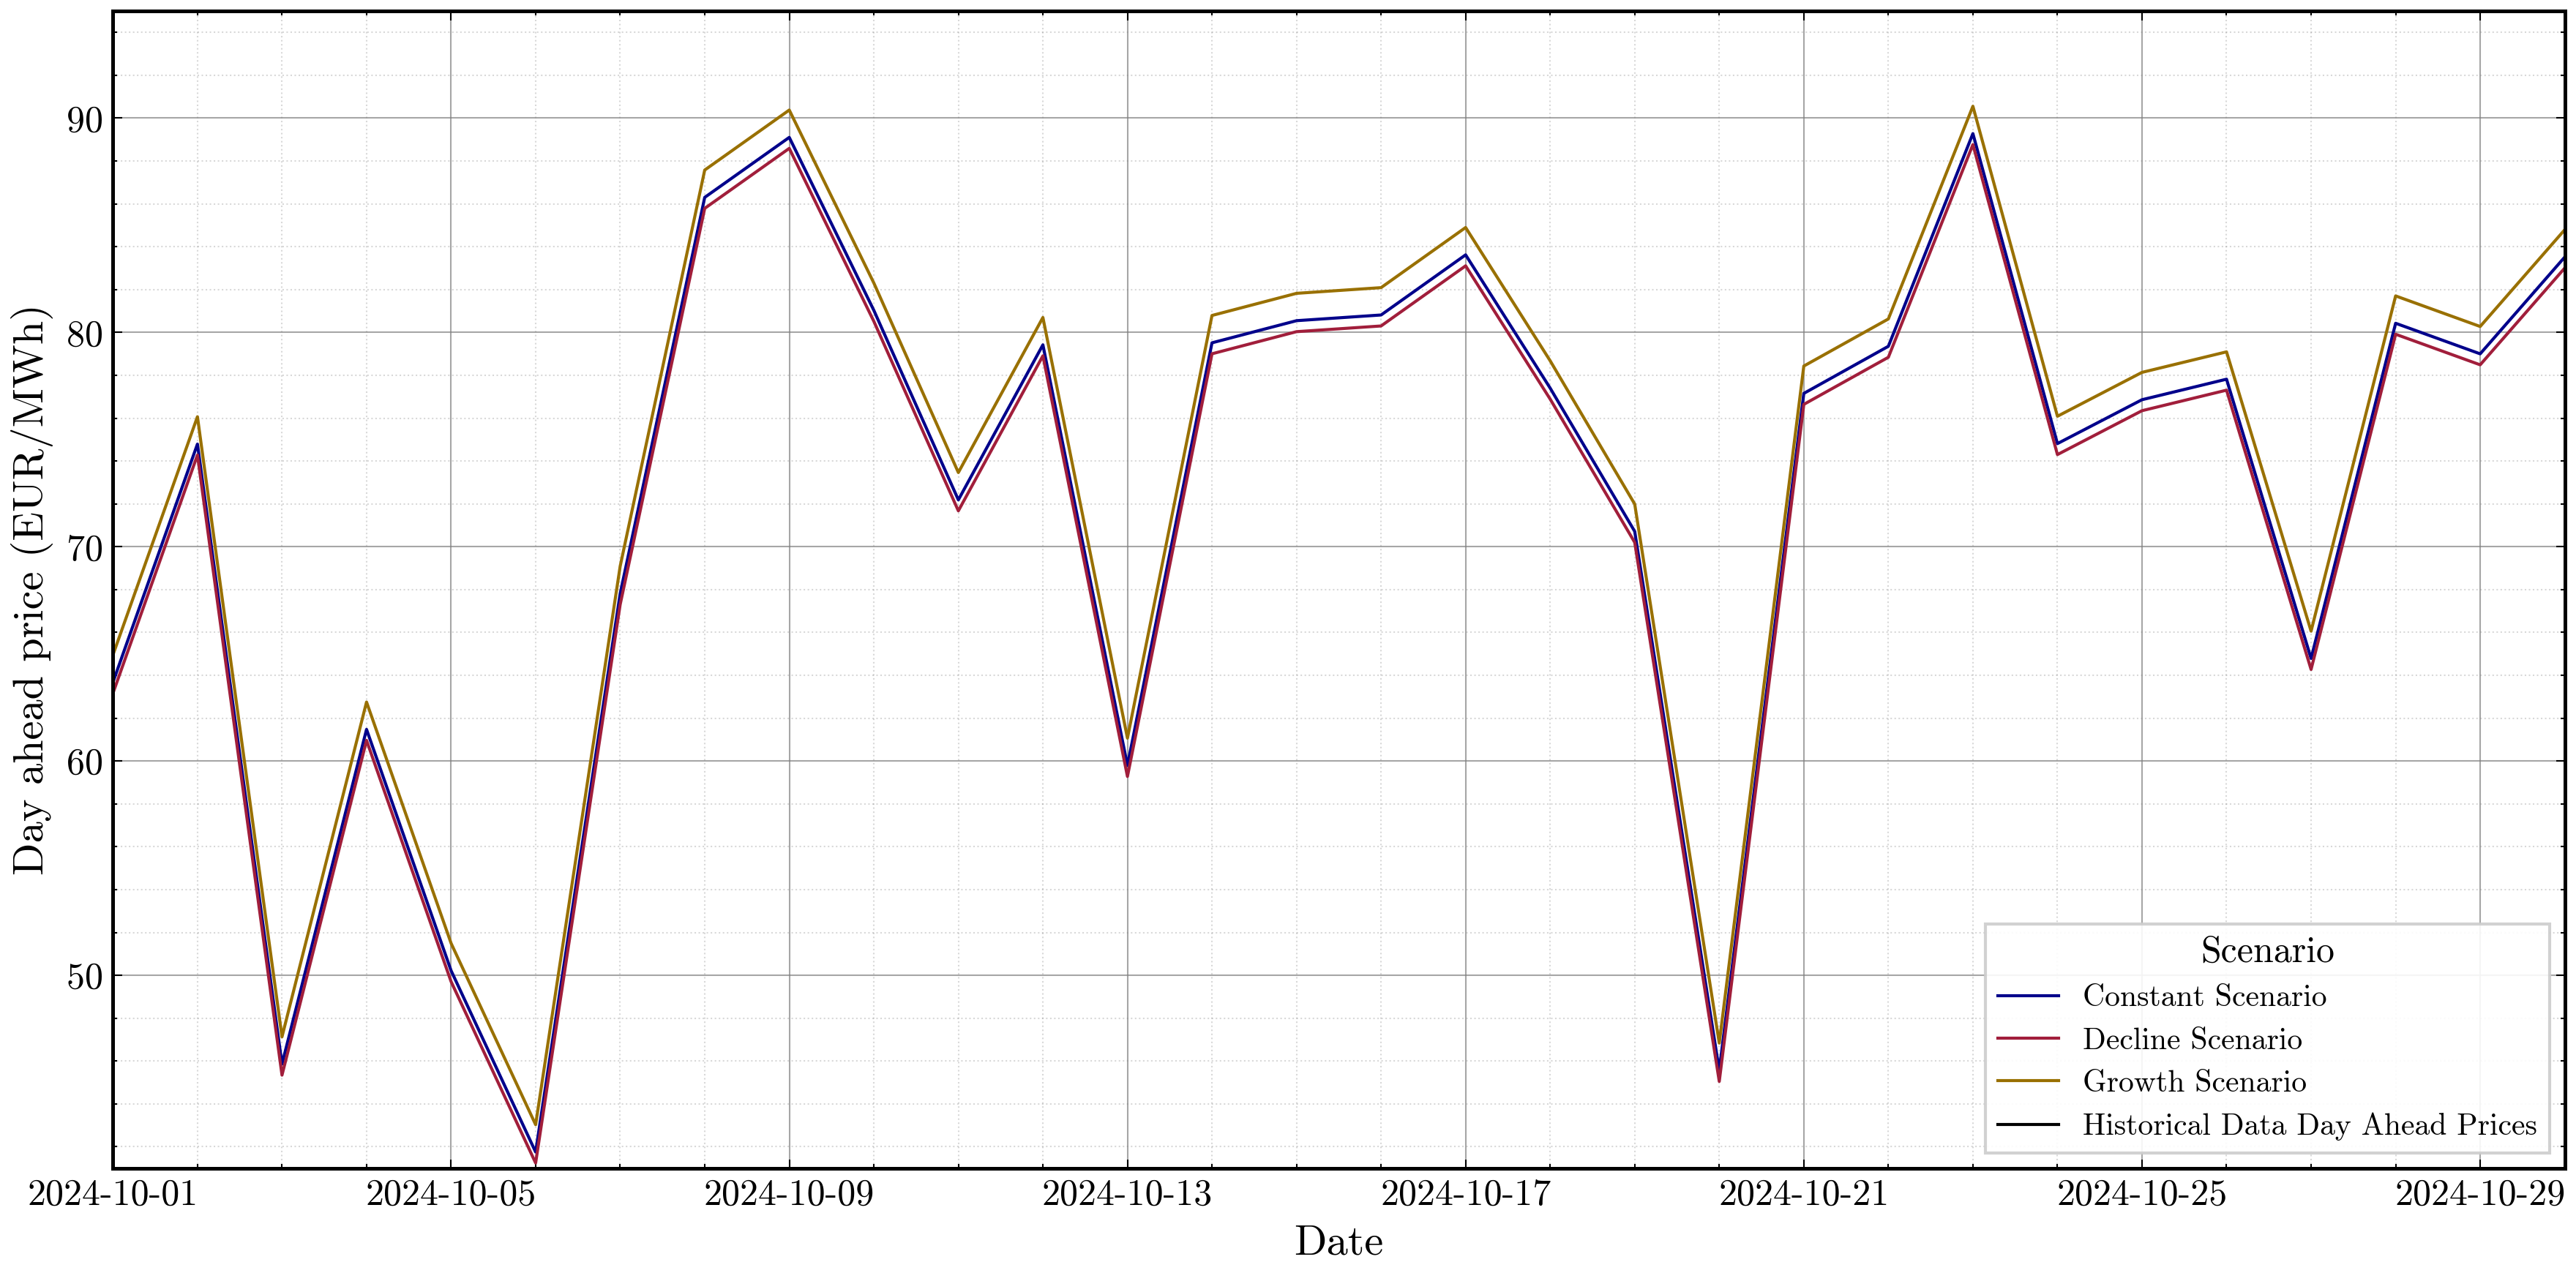

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots  # Import scienceplots package

# Load the CSV files
df_constant = pd.read_csv('prophet_results_constant.csv', index_col='ds')
df_decline = pd.read_csv('prophet_results_decline.csv', index_col='ds')
df_growth = pd.read_csv('prophet_results_growth.csv', index_col='ds')
# Load true forecast values
df_true = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_no_lags.csv')

# Select only the Day-ahead price column and the Date column for df_true
df_true = df_true[['Date', 'Day_ahead_price (€/MWh)']]
df_true.rename(columns={'Date': 'ds'}, inplace=True)
df_true.set_index('ds', inplace=True)

# Merge dataframes on the 'ds' column
merged_df = df_constant.merge(
    df_decline, on='ds', suffixes=('_constant', '_decline'))
merged_df = merged_df.merge(df_growth, on='ds')
merged_df = pd.concat([df_true, merged_df], axis=0)
merged_df.reset_index(inplace=True)

# Ensure 'ds' is in datetime format
merged_df['ds'] = pd.to_datetime(merged_df['ds'])

# Apply the SciencePlots style
plt.style.use(['science', 'no-latex'])

# Set figure properties
plt.figure(figsize=(12, 6), dpi=300)

# Plot each scenario with specified colors and line styles
plt.plot(merged_df['ds'], merged_df['yhat_constant'],
         label='Constant Scenario', color='darkblue', linewidth=1, linestyle='-')
plt.plot(merged_df['ds'], merged_df['yhat_decline'],
         label='Decline Scenario', color='#A11E3B', linewidth=1, linestyle='-')
plt.plot(merged_df['ds'], merged_df['yhat_growth'],
         label='Growth Scenario', color='#997000', linewidth=1, linestyle='-')

# Plot the true forecast values if available
if 'Day_ahead_price (€/MWh)' in merged_df.columns:
    plt.plot(merged_df['ds'], merged_df['Day_ahead_price (€/MWh)'],
             label='Historical Data Day Ahead Prices', color='black', linewidth=1)

# Customize axis labels and their font sizes
# Adjust x-axis label font size
plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel("Day ahead price (EUR/MWh)", fontsize=14,
           fontweight='bold')  # Adjust y-axis label font size

# Adjust the range of the x-axis and y-axis
# Set x-axis range
# merged_df['ds'].max()])
plt.xlim([pd.Timestamp('2024-10-01'), pd.Timestamp('2024-10-30')])
plt.ylim([41, 95])  # Set y-axis range based on data range

# Adjust tick label font size for x and y axes
plt.tick_params(axis='x', labelsize=12)  # Set x-axis tick label size
plt.tick_params(axis='y', labelsize=12)  # Set y-axis tick label size

# Add legend in the bottom right corner
plt.legend(
    title="Scenario", fontsize=10, title_fontsize='12',
    loc='lower right', frameon=True, fancybox=False, shadow=False, framealpha=0.9
)

# Customize grid and make plot borders more visible
plt.grid(True, which='major', linestyle='-',
         linewidth=0.5, color='gray', alpha=0.7)
plt.grid(True, which='minor', linestyle=':',
         linewidth=0.5, color='gray', alpha=0.3)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

# Apply tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# drop all rows where yhat_constant is NaN
merged_df = merged_df.dropna(subset=['yhat_constant'])

# Drop the 'Day_ahead_price (€/MWh)' column
merged_df = merged_df.drop(columns=['Day_ahead_price (€/MWh)'])

merged_df

,ds,yhat_constant,yhat_decline,yhat_growth
4586,2024-07-29,73.537033,73.502311,73.623838
4587,2024-07-30,73.841744,73.807022,73.928550
4588,2024-07-31,67.596365,67.563813,67.674490
4589,2024-08-01,65.852007,65.151054,67.601134
4590,2024-08-02,61.891475,61.190522,63.640602
...,...,...,...,...
5311,2026-07-24,82.467294,80.624851,90.145225
5312,2026-07-25,73.263965,71.421522,80.941896
5313,2026-07-26,67.937428,66.094985,75.615359
5314,2026-07-27,93.540734,91.698291,101.218665


## Computing some metrics 

In [ ]:
# Compute the differences between each scenario
merged_df['diff_constant_decline'] = merged_df['yhat_constant'] - \
    merged_df['yhat_decline']
merged_df['diff_constant_growth'] = merged_df['yhat_constant'] - \
    merged_df['yhat_growth']
merged_df['diff_decline_growth'] = merged_df['yhat_decline'] - \
    merged_df['yhat_growth']

# Compute the mean for each diff
mean_diff_constant_decline = merged_df['diff_constant_decline'].mean()
mean_diff_constant_growth = merged_df['diff_constant_growth'].mean()
mean_diff_decline_growth = merged_df['diff_decline_growth'].mean()

mean_decline = merged_df['yhat_decline'].mean()
mean_growth = merged_df['yhat_growth'].mean()
mean_constant = merged_df['yhat_constant'].mean()

print(mean_decline, mean_growth, mean_constant)

78.70756418167407 84.14354255190311 79.86108804254938


In [ ]:
print(mean_diff_constant_decline,
      mean_diff_constant_growth, mean_diff_decline_growth)

1.1535238608753058 4.282454509353716 5.435978370229022


In [60]:
# add the name of the weekday according to the date in the ds column to the merged_df
merged_df['ds'] = pd.to_datetime(merged_df['ds'])
merged_df['weekday'] = merged_df['ds'].dt.day_name()
merged_df

,ds,yhat_constant,yhat_decline,yhat_growth,diff_constant_decline,diff_constant_growth,diff_decline_growth,weekday
4586,2024-07-29,73.537033,73.502311,73.623838,0.034722,-0.086805,-0.121527,Monday
4587,2024-07-30,73.841744,73.807022,73.928550,0.034722,-0.086805,-0.121527,Tuesday
4588,2024-07-31,67.596365,67.563813,67.674490,0.032552,-0.078125,-0.110677,Wednesday
4589,2024-08-01,65.852007,65.151054,67.601134,0.700953,-1.749127,-2.450080,Thursday
4590,2024-08-02,61.891475,61.190522,63.640602,0.700953,-1.749127,-2.450080,Friday
...,...,...,...,...,...,...,...,...
5311,2026-07-24,82.467294,80.624851,90.145225,1.842443,-7.677931,-9.520374,Friday
5312,2026-07-25,73.263965,71.421522,80.941896,1.842443,-7.677931,-9.520374,Saturday
5313,2026-07-26,67.937428,66.094985,75.615359,1.842443,-7.677931,-9.520374,Sunday
5314,2026-07-27,93.540734,91.698291,101.218665,1.842443,-7.677931,-9.520374,Monday


In [61]:
# compute the average difference between the scenarios per weekday
weekday_diffs = merged_df.groupby('weekday').mean()

In [62]:
# Sort the weekdays in the correct order
weekday_diffs = weekday_diffs.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_diffs

,ds,yhat_constant,yhat_decline,yhat_growth,diff_constant_decline,diff_constant_growth,diff_decline_growth
weekday,,,,,,,
Monday,2025-07-28 00:00:00,82.561569,81.403400,86.864075,1.158169,-4.302506,-5.460675
Tuesday,2025-07-29 00:00:00,86.935275,85.777891,91.232573,1.157384,-4.297298,-5.454681
Wednesday,2025-07-26 12:00:00,86.049205,84.902979,90.306756,1.146227,-4.257551,-5.403778
Thursday,2025-07-27 12:00:00,82.881657,81.732301,87.147263,1.149357,-4.265605,-5.414962
Friday,2025-07-28 12:00:00,80.869304,79.717986,85.135473,1.151318,-4.266169,-5.417487
Saturday,2025-07-29 12:00:00,73.800863,72.647145,78.084122,1.153718,-4.283259,-5.436976
Sunday,2025-07-30 12:00:00,65.835755,64.677342,70.140214,1.158413,-4.304459,-5.462872


# Create adjusted plot for the chronos forecast 

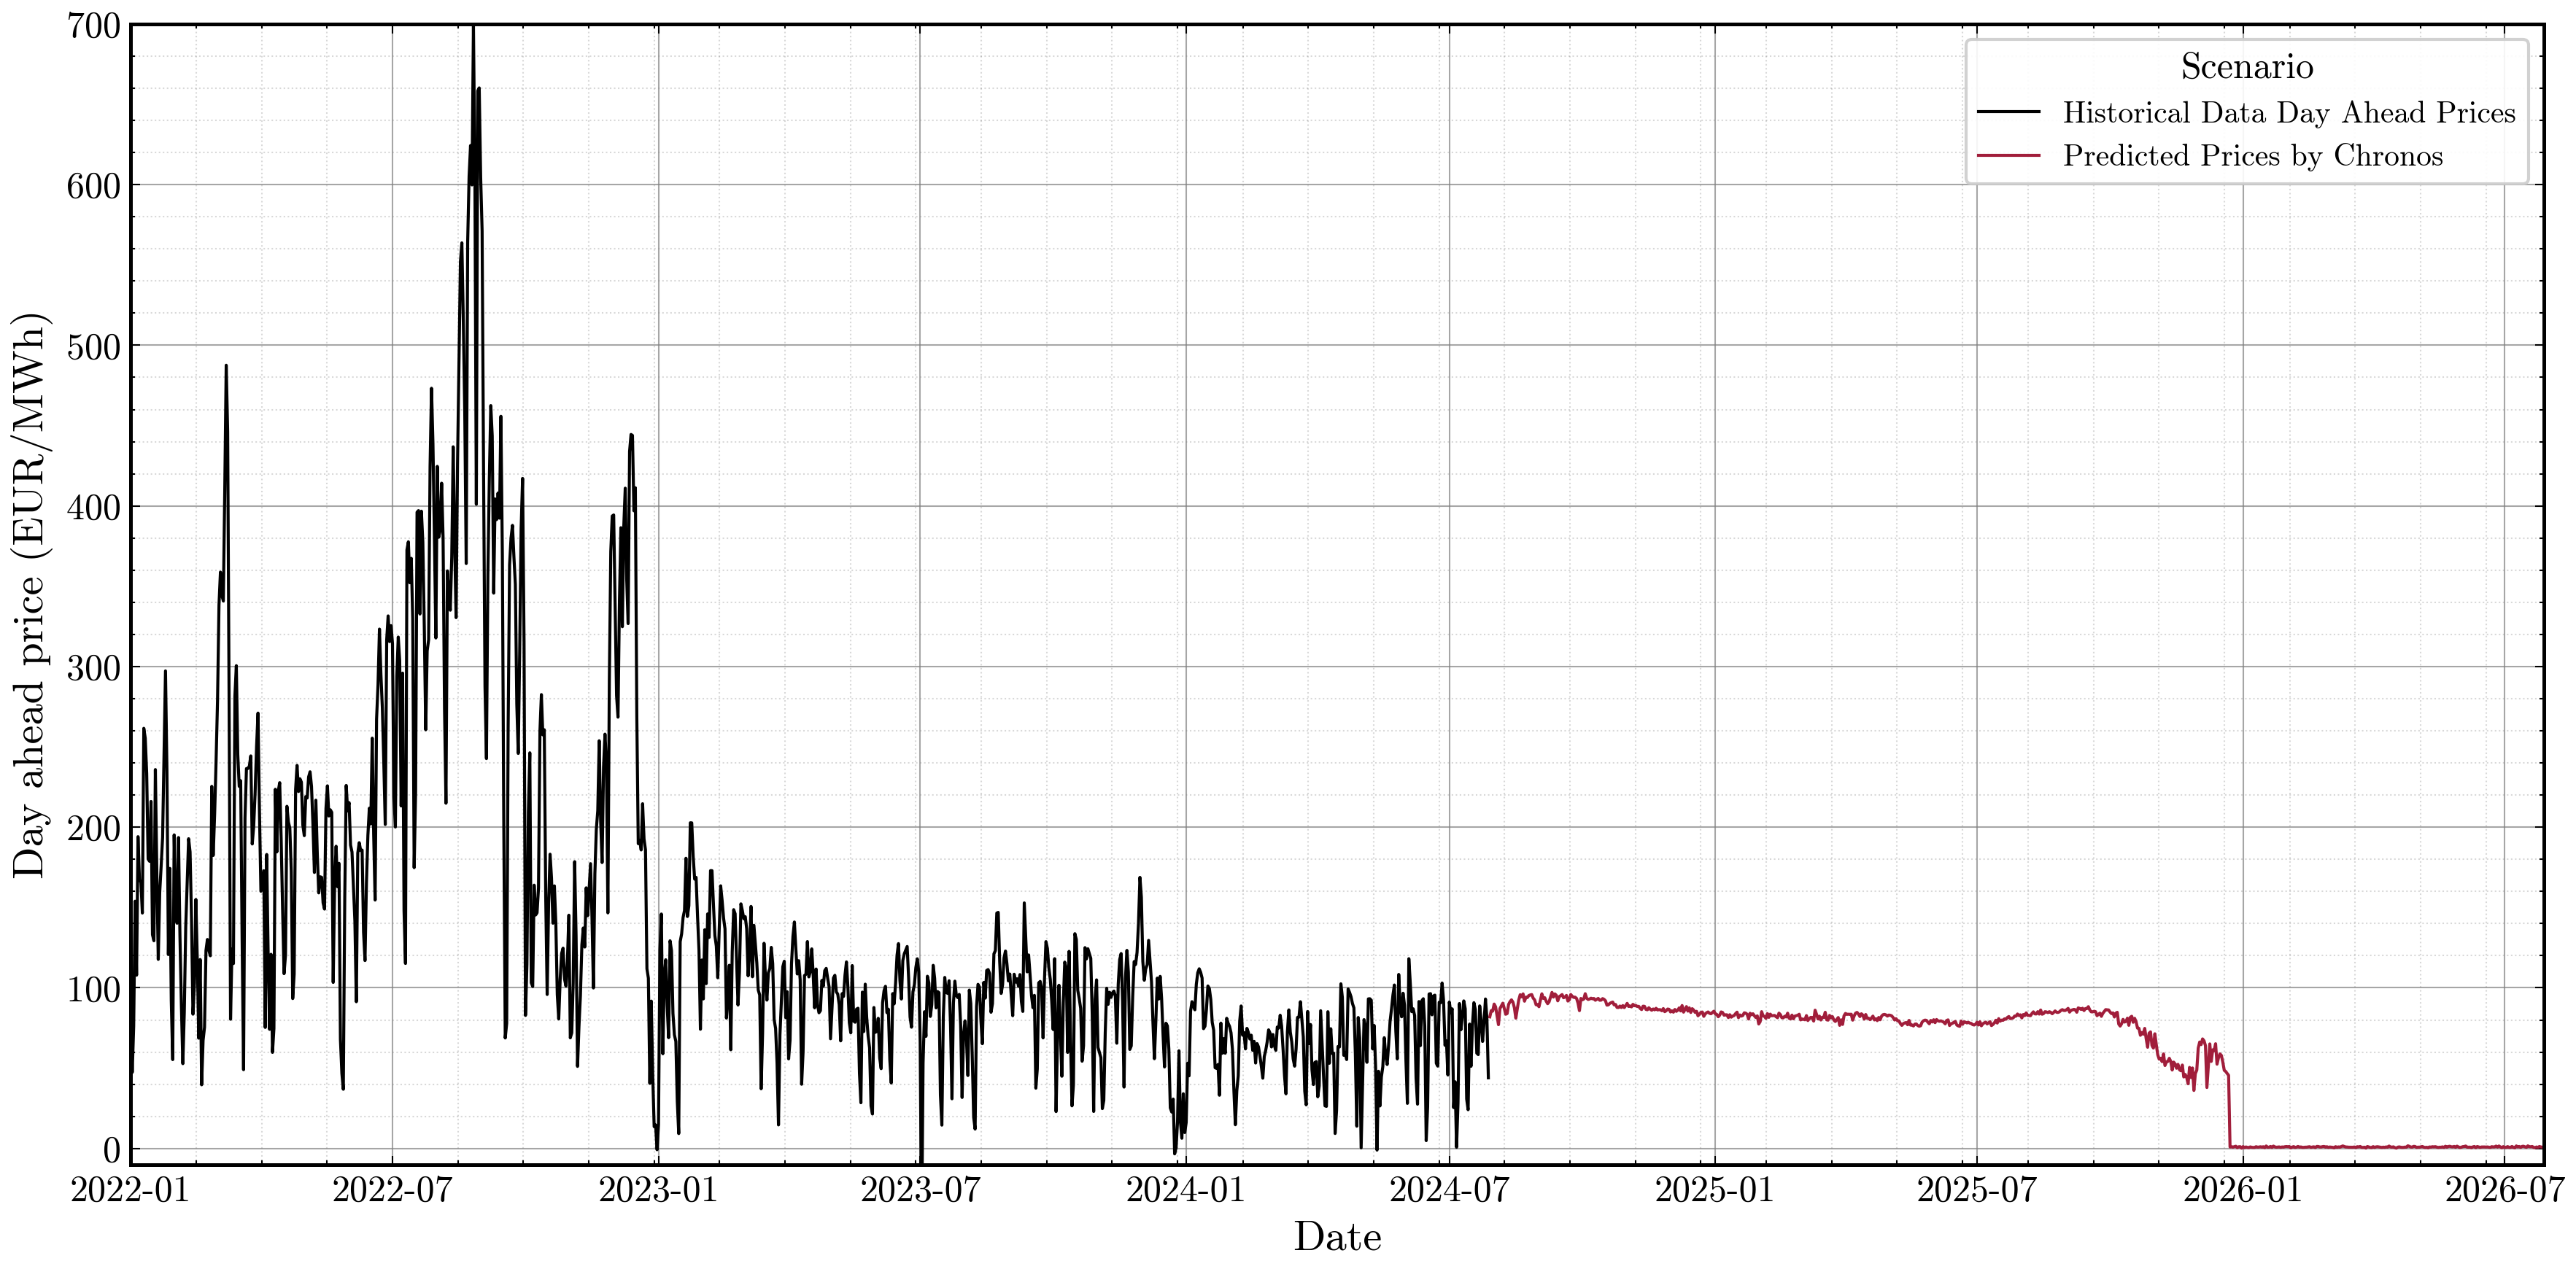

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots  # Import scienceplots package

# Load the CSV files
df_chronos = pd.read_csv(
    '../chronos/chronos_forecasts_large.csv', index_col='date')
# Ensure datetime format for proper plotting
df_chronos.index = pd.to_datetime(df_chronos.index)

# Load true forecast values
df_true = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_no_lags.csv')

# Select only the Day-ahead price column and the Date column for df_true
df_true = df_true[['Date', 'Day_ahead_price (€/MWh)']]
df_true.rename(columns={'Date': 'date'}, inplace=True)
df_true['date'] = pd.to_datetime(df_true['date'])  # Ensure datetime format
df_true.set_index('date', inplace=True)

# Concatenate the dataframes along columns
merged_df = pd.concat([df_chronos, df_true], axis=1)

# Apply the SciencePlots style
plt.style.use(['science', 'no-latex'])

# Set figure properties
plt.figure(figsize=(12, 6), dpi=300)

# Plot the historical data (from df_true) in one color
if 'Day_ahead_price (€/MWh)' in df_true.columns:
    plt.plot(df_true.index, df_true['Day_ahead_price (€/MWh)'],
             label='Historical Data Day Ahead Prices', color='black', linewidth=1)

# Plot the forecast data (from df_chronos) in a different color
if 'Day_ahead_price (€/MWh)' in df_chronos.columns:
    plt.plot(df_chronos.index, df_chronos['Day_ahead_price (€/MWh)'],
             label='Predicted Prices by Chronos', color='#A11E3B', linewidth=1, linestyle='-')

# Customize axis labels and their font sizes
plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel("Day ahead price (EUR/MWh)", fontsize=14, fontweight='bold')

# Adjust the range of the x-axis and y-axis
plt.xlim([pd.Timestamp('2022-01-01'), df_chronos.index.max()])
plt.ylim([-10, 700])

# Adjust tick label font size for x and y axes
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Add legend in the upper right corner
plt.legend(
    title="Scenario", fontsize=10, title_fontsize='12',
    loc='upper right', frameon=True, fancybox=True, shadow=False, framealpha=0.9
)

# Customize grid and make plot borders more visible
plt.grid(True, which='major', linestyle='-',
         linewidth=0.5, color='gray', alpha=0.7)
plt.grid(True, which='minor', linestyle=':',
         linewidth=0.5, color='gray', alpha=0.3)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

# Apply tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()